In [ ]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

# #Example windows
# CRDS_path = "G:\\My Drive\\teaching\\2023_astrotech\\crds\\"
# uncal_path = "G:\\My Drive\\teaching\\2023_astrotech\\NGC3324\\uncal\\"
# out_path = "G:\\My Drive\\teaching\\2023_astrotech\\NGC3324\\out\\"

# Fix paths for your local environment:
CRDS_path = ""
uncal_path = ""
out_path = ""

uncal_file_list = [os.path.join(uncal_path,"jw02731001004_02101_00002_nrca1_uncal.fits"),
                     os.path.join(uncal_path,"jw02731001004_02103_00002_nrca1_uncal.fits"),
                     os.path.join(uncal_path,"jw02731001004_02105_00002_nrca1_uncal.fits")]

Load a file and plot the first and last slice

The shape of the raw data is (6, 2048, 2048)


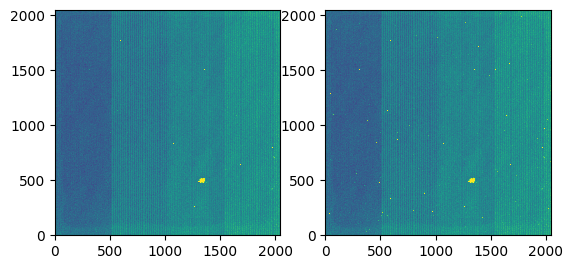

In [ ]:
hdulist = fits.open(uncal_file_list[0])
UTR_cube0 = hdulist["SCI"].data[0,]
tgroup = hdulist[0].header["TGROUP"]
myfilter = hdulist[0].header["FILTER"].strip()

print("The shape of the raw data is", UTR_cube0.shape)
plt.subplot(1,2,1)
plt.imshow(UTR_cube0[0,:,:],interpolation="nearest", origin="lower")
plt.clim([0,20000])
plt.subplot(1,2,2)
plt.imshow(UTR_cube0[-1,:,:],interpolation="nearest", origin="lower")
plt.clim([0,20000])


Plot a few ramps

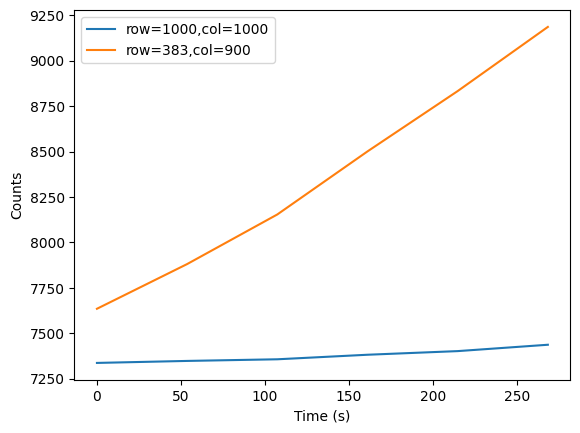

In [ ]:
Ngroups,ny,nx = UTR_cube0.shape
# Time sampling of the reads
t = np.arange(0,tgroup*Ngroups,tgroup)

k,l = 1000,1000
plt.plot(t,UTR_cube0[:,k,l],label="row={0},col={1}".format(k,l))
k,l = 383,900
plt.plot(t,UTR_cube0[:,k,l],label="row={0},col={1}".format(k,l))
plt.xlabel("Time (s)")
plt.ylabel("Counts")
plt.legend()

Load calibrations

In [ ]:
hdulist = fits.open(os.path.join(CRDS_path,"jwst_nircam_superbias_0120.fits"))
superbias = hdulist["SCI"].data

hdulist = fits.open(os.path.join(CRDS_path,"jwst_nircam_gain_0092.fits"))
gain = hdulist["SCI"].data

if myfilter == "F187N":
    hdulist = fits.open(os.path.join(CRDS_path,"jwst_nircam_flat_0471.fits"))
    flat = hdulist["SCI"].data
if myfilter == "F200W":
    hdulist = fits.open(os.path.join(CRDS_path,"jwst_nircam_flat_0496.fits"))
    flat = hdulist["SCI"].data
if myfilter == "F090W":
    hdulist = fits.open(os.path.join(CRDS_path,"jwst_nircam_flat_0601.fits"))
    flat = hdulist["SCI"].data

How to save a file

In [ ]:
out_filename = os.path.join(out_path,"test.fits")

mydata = np.zeros((10,10))

hdulist = fits.HDUList()
hdulist.append(fits.PrimaryHDU(data=mydata))
try:
    hdulist.writeto(out_filename, overwrite=True)
except TypeError:
    hdulist.writeto(out_filename, clobber=True)
hdulist.close()